# Classification des chiffres manuscrits du jeu de données MNIST

Dans cet exemple, nous aborderons la fascinante tâche de la classification des chiffres manuscrits en nous appuyant sur le jeu de données MNIST. Notre but sera de créer un modèle de réseau neuronal capable de reconnaître de manière automatisée les chiffres dessinés à la main. En exploitant TensorFlow, nous construirons un réseau de neurones qui apprendra à identifier des caractéristiques clés dans les images de chiffres et à les associer aux étiquettes de classe correspondantes. Cette démarche met en lumière comment TensorFlow se prête à la résolution de défis complexes de vision par ordinateur, et offre un aperçu des possibilités de création de modèles avancés pour des tâches similaires.

## 1. Importation des bibliothéques nécessaires

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 2. Préparation des données

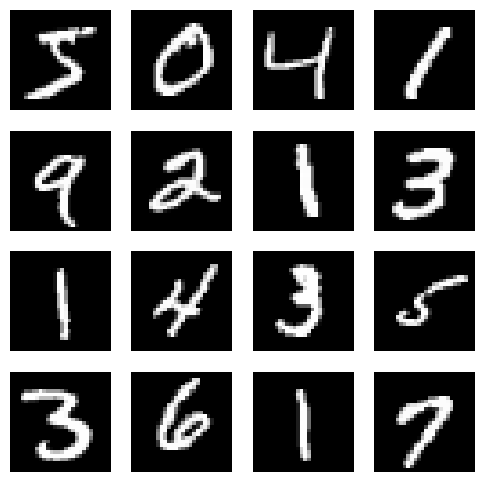

In [7]:
# Charger les données MNIST et les diviser en ensembles d'entraînement et de test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Affichage de quelques images d'entraînement
plt.figure(figsize=(6, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

## 3. Mise à l'échelle des caractéristiques

In [8]:
# Normaliser les valeurs des pixels entre 0 et 1
x_train, x_test = x_train / 255.0, x_test / 255.0


# Convertir les étiquettes en vecteurs one-hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


## 4. Construction du modèle

In [9]:
# Créer un modèle séquentiel
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Applatissement des images 28x28 en un vecteur de 784
    Dense(128, activation='relu'),   # Couche dense avec 128 neurones et fonction d'activation ReLU
    Dense(10, activation='softmax')  # Couche de sortie avec 10 neurones pour les 10 classes et activation softmax
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 5. Compilation du modèle

In [10]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 6. Entraînement du modèle

In [11]:
# Entraîner le modèle
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2860 - accuracy: 0.9180 - val_loss: 0.1529 - val_accuracy: 0.9557
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1285 - accuracy: 0.9619 - val_loss: 0.1127 - val_accuracy: 0.9654
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0870 - accuracy: 0.9746 - val_loss: 0.1184 - val_accuracy: 0.9641
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0662 - accuracy: 0.9806 - val_loss: 0.0875 - val_accuracy: 0.9753
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0496 - accuracy: 0.9857 - val_loss: 0.0859 - val_accuracy: 0.9757


## 7. Évaluation des résultats

In [12]:
# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Accuracy on test set: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9766
Accuracy on test set: 0.9765999913215637


#### Affichage des images non reconnues

313/313 [==============================] - 1s 2ms/step


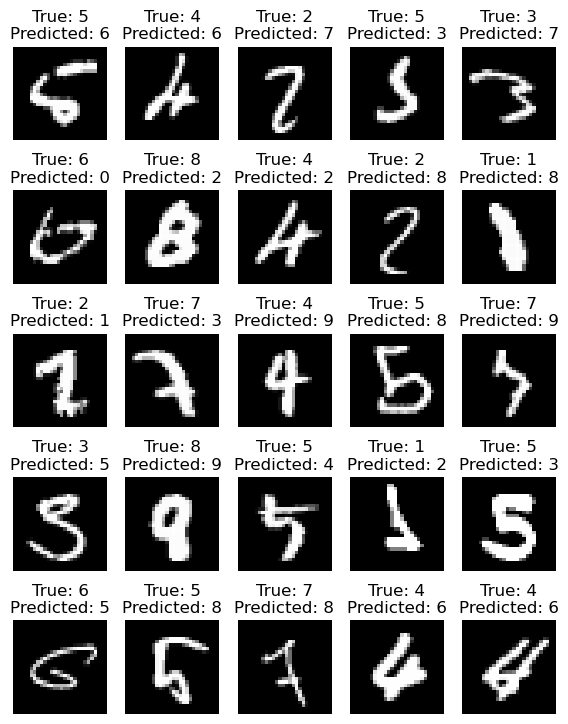

In [13]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Affichage de quelques images mal classées
misclassified_indices = np.where(y_pred_labels != y_true_labels)[0]
plt.figure(figsize=(7, 9))
for i, idx in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_labels[idx]}\nPredicted: {y_pred_labels[idx]}')
    plt.axis('off')
plt.show()




#### Matrice de confusion

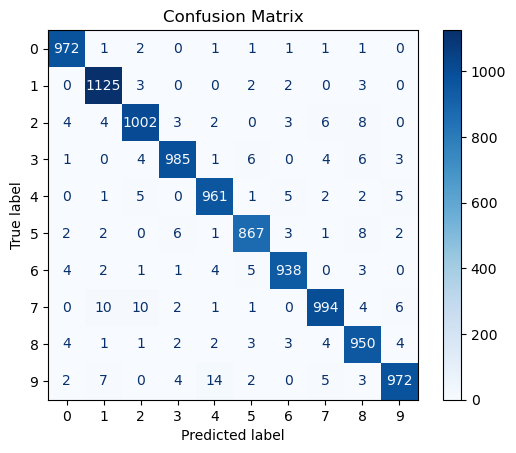

In [14]:
# Matrice de confusion
confusion = confusion_matrix(y_true_labels, y_pred_labels)
confusion_display = ConfusionMatrixDisplay(confusion, display_labels=np.arange(10))
confusion_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()